# **Regressão para previsão de CRA**

Author: Arthur Felipe Thamay

Nessa tarefa você vai construir modelos de regressão para a previsão do CRA final de alunos de computação usando somente as notas de disciplinas do primeiro período.

1. Copie esse notebook onde os dados já foram carregados e particionados em treino e teste.
2. Use o método de enumeração de subconjuntos para gerar todos os subconjuntos possíveis de atributos (conjunto das partes).
3. Treine um modelo para cada subconjunto possível e avalie no teste com RMSE.
4. Plote um gráfico com os melhores resultados para cada tamanho de subconjunto possível.
5. Quais atributos geraram o melhor modelo?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import KFold


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Carregando os dados**

In [ ]:
df = pd.read_csv('https://drive.google.com/u/0/uc?id=14SE9dbREY-g9IEZnBzghx6lc4itR2UTR&export=download')
df.head()

,Cálculo1,LPT,P1,IC,Cálculo2,cra
0,8.7,10.0,9.0,9.1,8.4,8.477647
1,7.0,7.0,7.7,7.0,6.2,6.851724
2,8.6,9.8,7.9,9.6,8.7,9.090588
3,7.8,8.3,6.8,8.2,8.0,7.283516
4,5.2,9.3,5.0,8.5,5.0,7.205747


### Sumário dos Dados

In [ ]:
df.describe()

,Cálculo1,LPT,P1,IC,Cálculo2,cra
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,7.200000,8.480114,7.407955,8.172727,6.323864,7.332535
std,1.228493,0.984522,1.346278,0.894007,1.293662,0.849758
min,5.000000,6.200000,5.000000,5.900000,5.000000,4.874468
25%,6.275000,7.700000,6.500000,7.500000,5.100000,6.841484
50%,7.200000,8.500000,7.750000,8.200000,5.800000,7.274746
75%,8.125000,9.300000,8.325000,8.800000,7.500000,7.883292
max,9.800000,10.000000,10.000000,10.000000,9.300000,9.090588


### Data Analysis

Primeiramente, vamos observar a correlação entre cada variável:

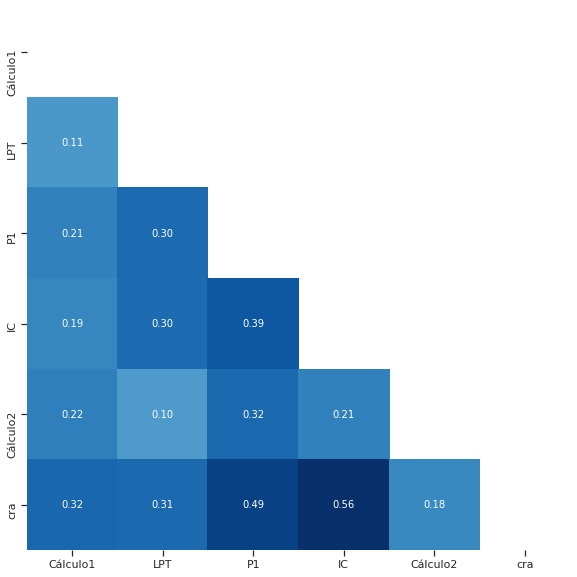

In [ ]:
corr = df.corr(method='spearman')
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots()
ax.figure.set_size_inches(10, 10)
sns.heatmap(corr, ax=ax, annot=True, mask=mask, fmt='.2f', cbar=False, square=True, cmap=plt.cm.Blues, center=0)

Além disso, vamos observar através de um gráfico de dispersão, a relação de cada atributo com a saída:

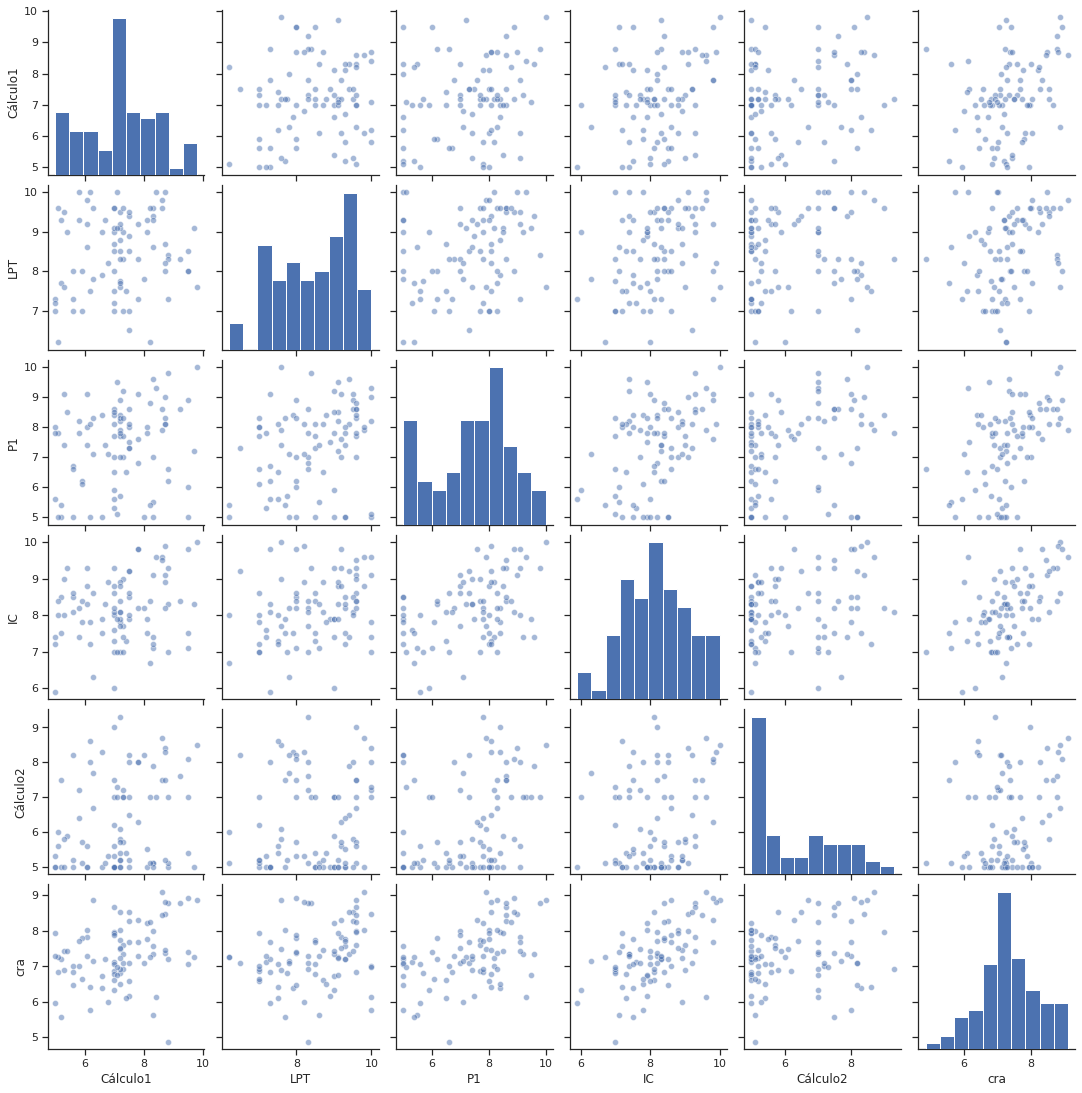

In [ ]:
sns.pairplot(df, plot_kws = {'alpha': 0.5})
plt.show()

## **Regressão Simples**

Partição Treino/Teste

In [ ]:
x = df[['Cálculo1']]
y = df.cra.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(74, 1) (74,)
(14, 1) (14,)


Normalização

In [ ]:
norm = StandardScaler()
norm = norm.fit(x_train)

x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

Treinando o modelo

RMSE no conjunto de treino: 0.8544106173874905


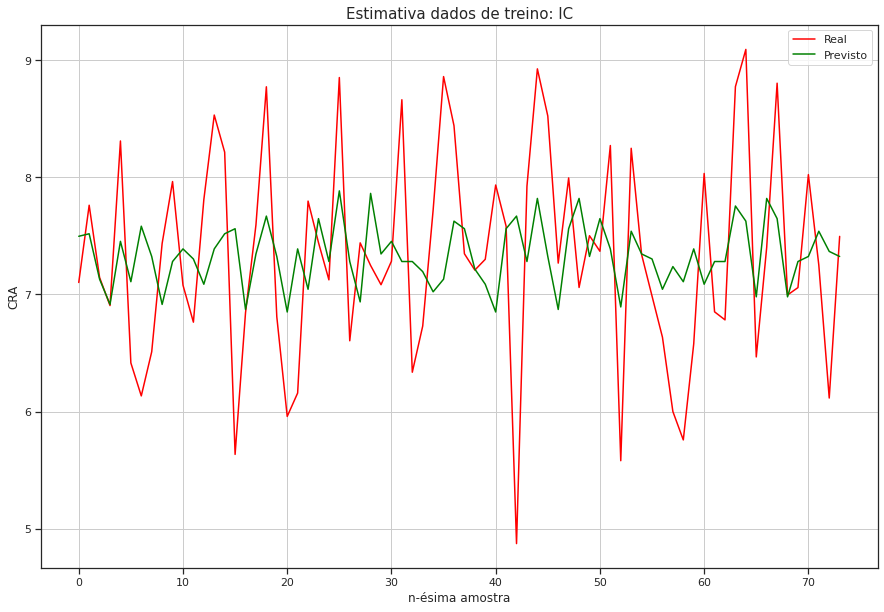

In [ ]:
model = LinearRegression()
model.fit(x_train_norm, y_train)

y_pred = model.predict(x_train_norm)

df_c1_corr = pd.DataFrame({'Real': y_train.flatten(), 'Previsto': y_pred.flatten()})
df_c1_corr.head(10)

def estimate_plot(y, y_pred, label_set, label_var, color):
    plt.figure(figsize=(15, 10))
    plt.title('Estimativa dados de treino: IC', fontsize = 15)
    plt.plot(y, label='Real', color=color[0])
    plt.plot(y_pred, label='Previsto', color=color[1])
    plt.xlabel('n-ésima amostra')
    plt.ylabel('CRA')
    plt.grid()
    plt.legend()
estimate_plot(y_train, y_pred, 'Treino', 'Cálculo1',['red','green'])

print('RMSE no conjunto de treino:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Conjunto de Teste

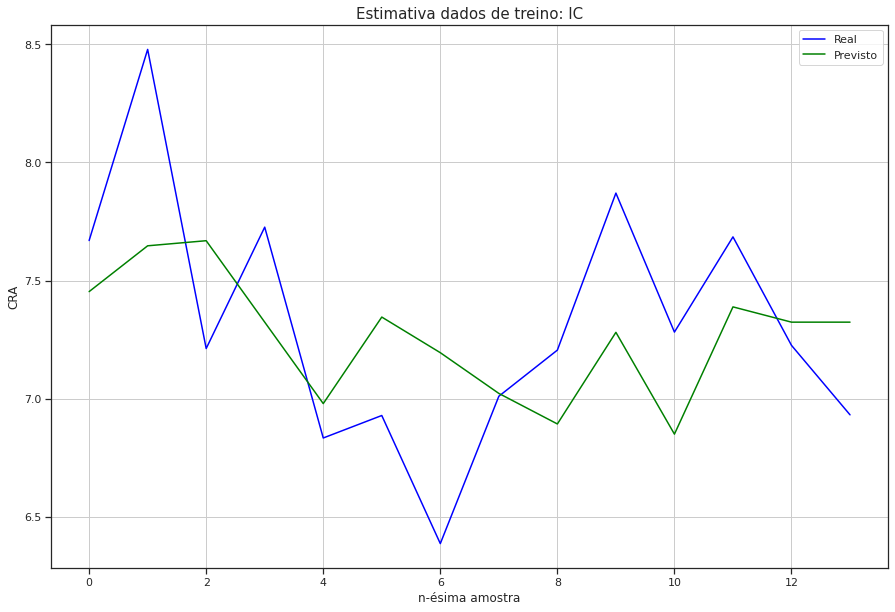

In [ ]:
y_pred = model.predict(x_test_norm)

df_c1_corr = pd.DataFrame({'Real': y_test.flatten(), 'Previsto': y_pred.flatten()})
df_c1_corr.head(10)

estimate_plot(y_test, y_pred, 'Teste', 'Cálculo1', ['blue', 'green'])

## **Regressão Múltipla**

Partição Treino/Teste (Cálculo1, LPT)

In [ ]:
x = df[['Cálculo1', 'LPT']]
y = df.cra.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(74, 2) (74,)
(14, 2) (14,)


Normalização

In [ ]:
norm = StandardScaler()
norm = norm.fit(x_train)

x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

Treinando o modelo

RMSE no conjunto de treino: 0.832325085543323


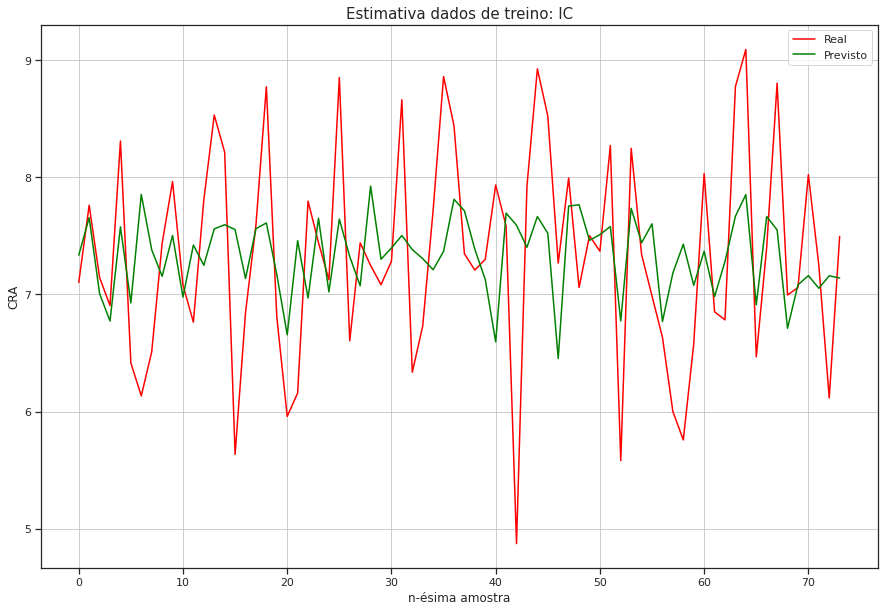

In [ ]:
model = LinearRegression()
model.fit(x_train_norm, y_train)

y_pred = model.predict(x_train_norm)

df_c1_lpt_corr = pd.DataFrame({'Real': y_train.flatten(), 'Previsto': y_pred.flatten()})
df_c1_lpt_corr.head(10)

estimate_plot(y_train, y_pred, 'Treino', 'Cálculo1, LPT',['red','green'])

print('RMSE no conjunto de treino:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Conjunto de Teste

RMSE no conjunto de teste: 0.42453914115463304


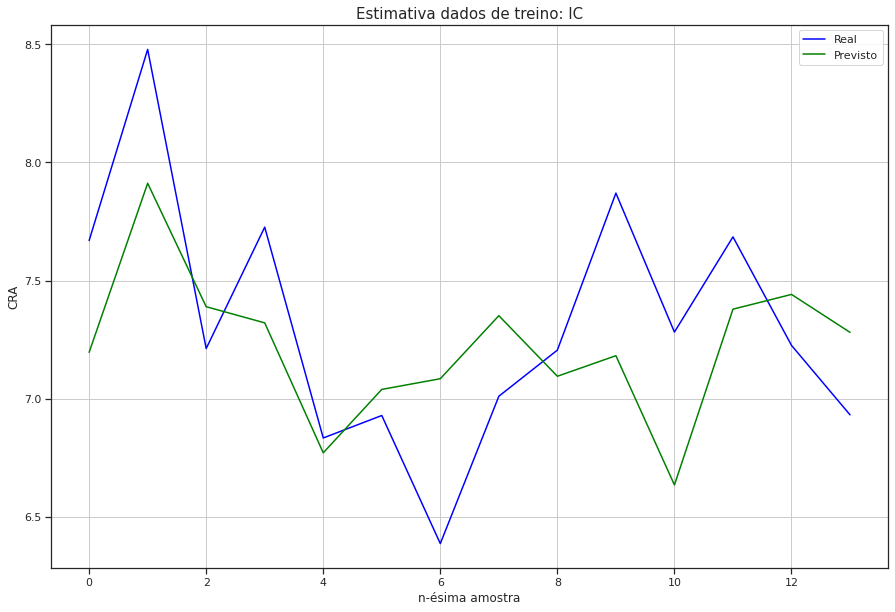

In [ ]:
y_pred = model.predict(x_test_norm)

df_c1_lpt_corr = pd.DataFrame({'Real': y_test.flatten(), 'Previsto': y_pred.flatten()})
df_c1_lpt_corr.head(10)

estimate_plot(y_test, y_pred, 'Teste', 'Cálculo1, LPT',['blue','green'])

print('RMSE no conjunto de teste:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Partição Treino/Teste (Cálculo 1, LPT, P1)

In [ ]:
x = df[['Cálculo1','LPT','P1']]
y = df.cra.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(74, 3) (74,)
(14, 3) (14,)


Normalização

In [ ]:
norm = StandardScaler()
norm = norm.fit(x_train)

x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

Treinando o modelo

RMSE no conjunto de treino: 0.7393045791768352


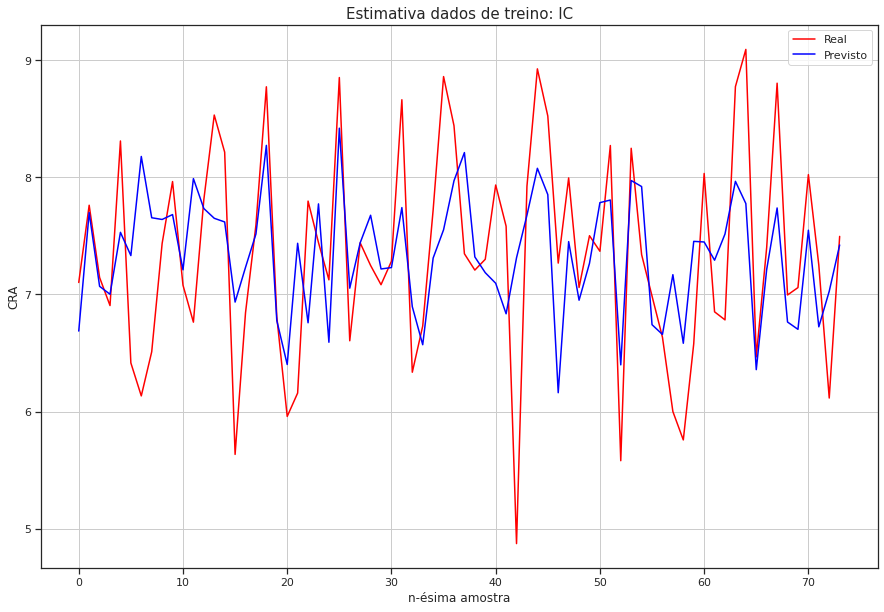

In [ ]:
model = LinearRegression()
model.fit(x_train_norm, y_train)

y_pred = model.predict(x_train_norm)

df_c1_lpt_p1_corr = pd.DataFrame({'Real': y_train.flatten(), 'Previsto': y_pred.flatten()})
df_c1_lpt_p1_corr.head(10)

estimate_plot(y_train, y_pred, 'Treino', 'Cálculo1, LPT, P1',['red','blue'])

print('RMSE no conjunto de treino:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Conjunto de Teste

RMSE no conjunto de teste: 0.5219517403379104


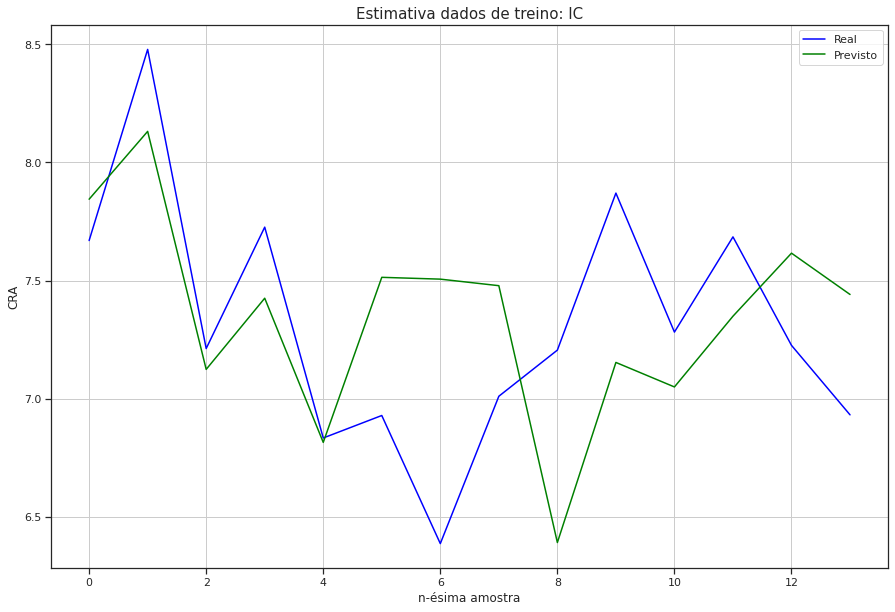

In [ ]:
y_pred = model.predict(x_test_norm)

df_c1_lpt_p1_corr = pd.DataFrame({'Real': y_test.flatten(), 'Previsto': y_pred.flatten()})
df_c1_lpt_p1_corr.head(10)

estimate_plot(y_test, y_pred, 'Teste', 'IC, P1, Cálculo1',['blue','green'])

print('RMSE no conjunto de teste:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Partição Treino/Teste (Cálculo1, LPT, IC, P1)

In [ ]:
x = df[['Cálculo1','LPT','IC','P1']]
y = df.cra.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(74, 4) (74,)
(14, 4) (14,)


Normalização

In [ ]:
norm = StandardScaler()
norm = norm.fit(x_train)

x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

Treinando o modelo

RMSE no conjunto de treino: 0.6775034161677989


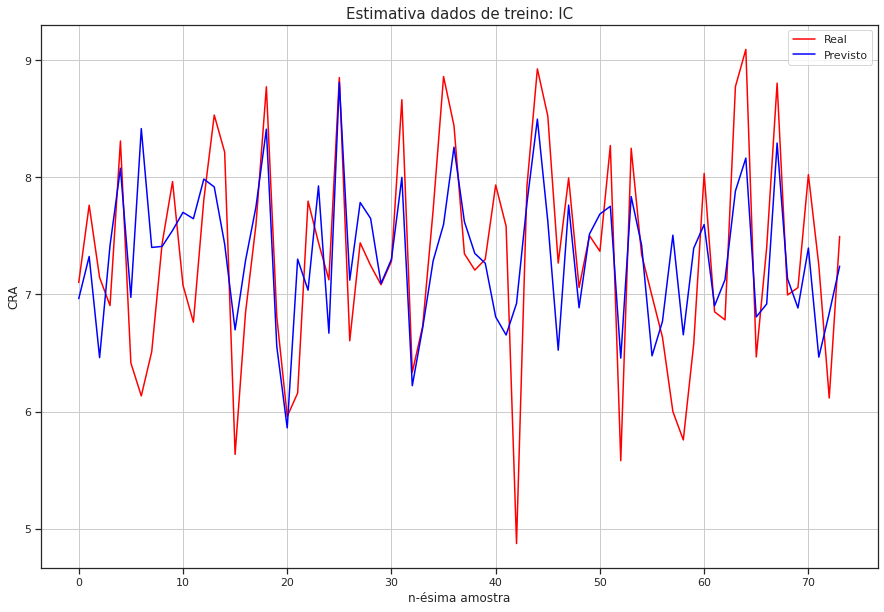

In [ ]:
model = LinearRegression()
model.fit(x_train_norm, y_train)

y_pred = model.predict(x_train_norm)

df_c1_lpt_p1_ic_corr = pd.DataFrame({'Real': y_train.flatten(), 'Previsto': y_pred.flatten()})
df_c1_lpt_p1_ic_corr.head(10)

estimate_plot(y_train, y_pred, 'Treino', 'Cálculo1, LPT, IC, P1',['red','blue'])

print('RMSE no conjunto de treino:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Conjunto de Teste

RMSE no conjunto de teste: 0.4147369260309112


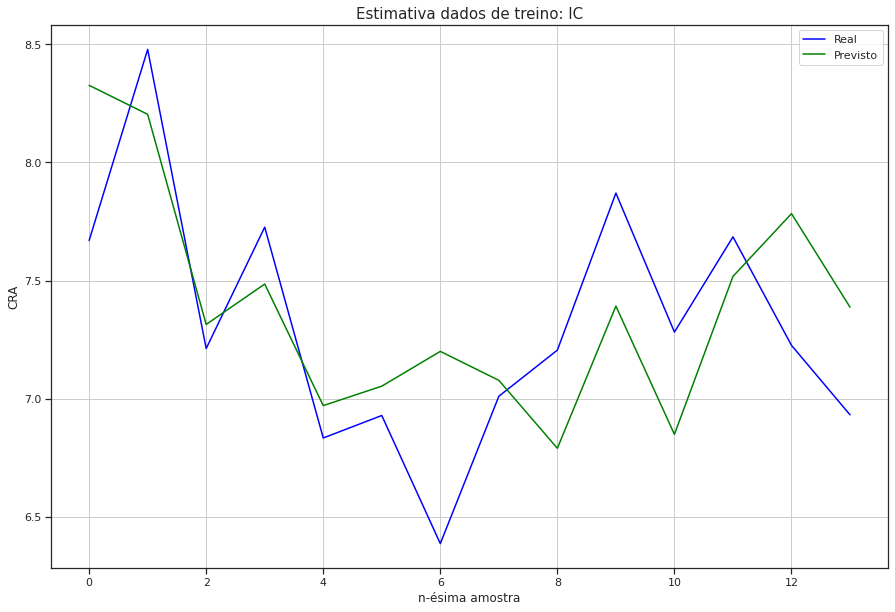

In [ ]:
y_pred = model.predict(x_test_norm)

df_c1_lpt_p1_ic_corr = pd.DataFrame({'Real': y_test.flatten(), 'Previsto': y_pred.flatten()})
df_c1_lpt_p1_ic_corr.head(10)

estimate_plot(y_test, y_pred, 'Teste', 'Cálculo1, LPT, IC, P1',['blue','green'])

print('RMSE no conjunto de teste:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Partição Treino/Teste (Cálculo1, LPT, P1, IC, Cálculo2)

In [ ]:
x = df[['Cálculo1','LPT','P1','IC','Cálculo2']]
y = df.cra.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(74, 5) (74,)
(14, 5) (14,)


Normalização

In [ ]:
norm = StandardScaler()
norm = norm.fit(x_train)

x_train_norm = norm.transform(x_train)
x_test_norm = norm.transform(x_test)

Treinando o modelo

RMSE no conjunto de treino: 0.6738290372710954


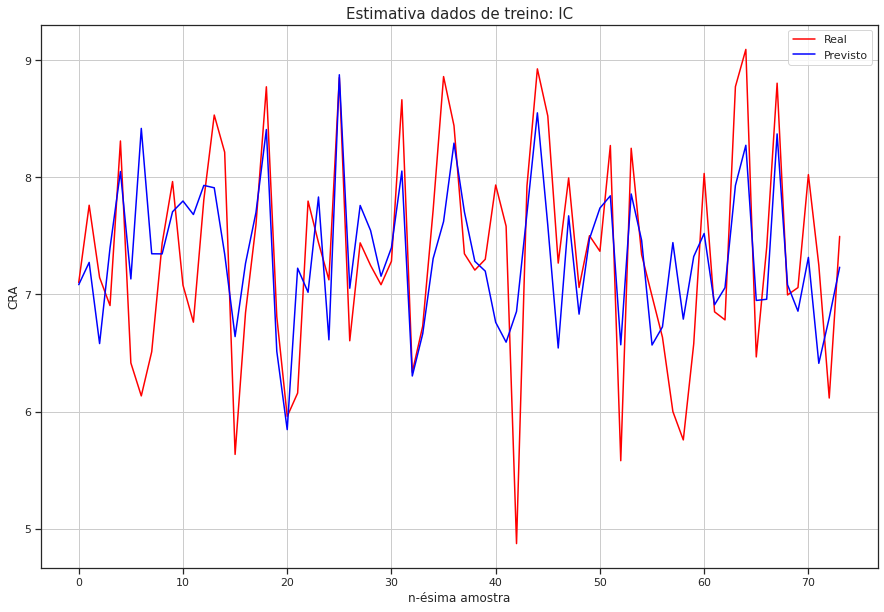

In [ ]:
model = LinearRegression()
model.fit(x_train_norm, y_train)

y_pred = model.predict(x_train_norm)

df_c1_lpt_p1_ic_c2_corr = pd.DataFrame({'Real': y_train.flatten(), 'Previsto': y_pred.flatten()})
df_c1_lpt_p1_ic_c2_corr.head(10)

estimate_plot(y_train, y_pred, 'Treino', 'Cálculo1, LPT, P1, IC, Cálculo2',['red','blue'])

print('RMSE no conjunto de treino:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

Conjunto de Teste

RMSE no conjunto de teste: 0.4604563550448599


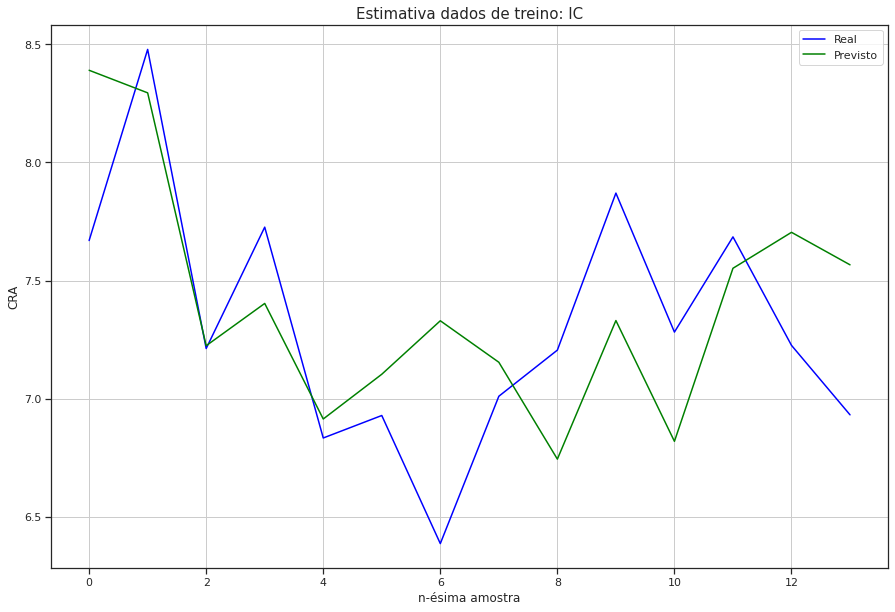

In [ ]:
y_pred = model.predict(x_test_norm)

df_c1_lpt_p1_ic_c2_corr = pd.DataFrame({'Real': y_test.flatten(), 'Previsto': y_pred.flatten()})
df_c1_lpt_p1_ic_c2_corr.head(10)

estimate_plot(y_test, y_pred, 'Teste', 'Cálculo1, LPT, P1, IC, Cálculo2',['blue','green'])

print('RMSE no conjunto de teste:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## **Conclusão**

Para o nosso problema, considerando que um subconjunto de alunos que possuem apenas CRA's equivalentes e tomando um aluno para ordenar o arquivo, inicialmente normalizamos os dados e aplicamos regressão simples e múltipla.
É possível observar a presença de um viés de amostragem nos dados de teste, devido ao fato de que os RMSE's de treino serem menores que os de teste.
A divisão para treinamento e teste é eficiente quando se utiliza Holdout, ou seja quando divide o conjunto de dados em um conjunto de 'treino' e 'teste'. É possível que a divisão não seja aleatória o suficiente, causando - por exemplo - uma restrição por estados, sexo ou idade.
O modelo que avalia exclusivamente a única variável está atribuido ao menor RMSE. No entando, este é um problema simples. Naturalmente, um modelo no qual sejam atribuidas mais variáveis, seja menos preciso.  
